# Capital Markets Profitability Simulator

Welcome to the **Capital Markets Profitability Simulator**, a Python-based analytics project designed to model and visualize the profitability of financial products across global markets. This notebook is part of my GitHub portfolio and demonstrates my ability to work with financial data, simulate economic scenarios, and build insightful visualizations.

### Project Objectives
- Simulate cash flows under varying interest rate environments
- Calculate Net Present Value (NPV) and Internal Rate of Return (IRR)
- Compare profitability across countries using macroeconomic indicators
- Visualize trends and risk-adjusted returns
- Generate actionable insights and exportable reports

This project integrates Python, Pandas, Seaborn, and financial data to showcase data analysis, financial modeling, and visualization skills.

---

## Step 1: Upload and Preview the Dataset

We begin by loading a dataset containing global financial and macroeconomic indicators for 39 countries (2024). This includes stock index values, interest rates, inflation, GDP growth, and more.

### Instructions
- Ensure the dataset is in CSV format and located in the working directory.
- Use `pandas` to load and preview the data.
- Check for missing values and understand the structure before analysis.

This step sets the foundation for all subsequent modeling and visualization.

## Data Source

The dataset used in this project was obtained from [Kaggle: Global Finance and Economic Indicators Dataset (2024)](https://www.kaggle.com/datasets/imaadmahmood/global-finance-and-economic-indicators-dataset-2024?select=Global+finance+data.csv). It includes macroeconomic and financial data for 39 countries, such as stock indices, interest rates, inflation, and GDP growth.

In [15]:
# Load the dataset
import pandas as pd
df = pd.read_csv('Global_finance_data.csv')

# Preview first few rows
df.head(5) 

,Country,Date,Stock_Index,Index_Value,Daily_Change_Percent,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,...,Commodity_Index,Oil_Price_USD_Barrel,Gold_Price_USD_Ounce,Bond_Yield_10Y_Percent,Credit_Rating,Political_Risk_Score,Banking_Sector_Health,Real_Estate_Index,Export_Growth_Percent,Import_Growth_Percent
0,United States,2024-08-15,S&P_500,5437.2,0.34,51.2,2.8,2.9,5.50,3.7,...,1.12,77.85,2487.5,4.25,AAA,8.1,Strong,145.6,3.2,2.8
1,China,2024-08-15,Shanghai_Composite,2891.6,-0.82,12.4,5.2,0.8,3.10,5.2,...,0.98,77.85,2487.5,2.15,A+,6.7,Moderate,98.7,8.9,6.1
2,Japan,2024-08-15,Nikkei_225,36789.1,1.24,6.8,0.9,2.8,-0.10,2.4,...,1.05,77.85,2487.5,0.89,A+,8.4,Strong,89.3,5.1,4.7
3,Germany,2024-08-15,DAX,18234.5,0.67,2.9,0.3,2.2,4.50,3.1,...,1.08,77.85,2487.5,2.31,AAA,8.7,Strong,112.4,2.1,1.8
4,United Kingdom,2024-08-15,FTSE_100,8156.3,-0.15,3.1,1.1,2.0,5.25,4.2,...,1.06,77.85,2487.5,3.89,AA,7.9,Moderate,97.8,0.9,1.2


---
## Step 2: Clean and Transform the Data

Before diving into simulations, we clean and format the dataset to ensure consistency and usability.

### Tasks
- Convert date columns to datetime format
- Rename columns for easier access
- Select relevant macroeconomic indicators
- Handle missing or inconsistent data

This step ensures our data is ready for scenario modeling and profitability analysis.

In [16]:
# 1) Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2) Rename columns for easier access (optional: use snake_case)
df.rename(columns={
    'Stock_Index': 'stock_index',
    'Index_Value': 'index_value',
    'Daily_Change_Percent': 'daily_change_pct',
    'Market_Cap_Trillion_USD': 'market_cap_usd_trillions',
    'GDP_Growth_Rate_Percent': 'gdp_growth_pct',
    'Inflation_Rate_Percent': 'inflation_pct',
    'Interest_Rate_Percent': 'interest_rate_pct',
    'Unemployment_Rate_Percent': 'unemployment_pct',
    'Exchange_Rate_USD': 'exchange_rate_usd',
    'Currency_Change_YTD_Percent': 'currency_change_ytd_pct',
    'Government_Debt_GDP_Percent': 'gov_debt_gdp_pct',
    'Current_Account_Balance_Billion_USD': 'current_account_usd_billion',
    'FDI_Inflow_Billion_USD': 'fdi_inflow_usd_billion',
    'Oil_Price_USD_Barrel': 'oil_price_usd',
    'Gold_Price_USD_Ounce': 'gold_price_usd',
    'Bond_Yield_10Y_Percent': 'bond_yield_10y_pct',
    'Political_Risk_Score': 'political_risk_score',
    'Real_Estate_Index': 'real_estate_index',
    'Export_Growth_Percent': 'export_growth_pct',
    'Import_Growth_Percent': 'import_growth_pct'
}, inplace=True)

# 3) Select relevant macroeconomic indicators for simulation
selected_columns = [
    'Country', 'Date', 'stock_index', 'index_value', 'daily_change_pct',
    'market_cap_usd_trillions', 'gdp_growth_pct', 'inflation_pct',
    'interest_rate_pct', 'unemployment_pct', 'exchange_rate_usd',
    'gov_debt_gdp_pct', 'current_account_usd_billion', 'fdi_inflow_usd_billion',
    'oil_price_usd', 'gold_price_usd', 'bond_yield_10y_pct',
    'political_risk_score', 'real_estate_index', 'export_growth_pct',
    'import_growth_pct'
]
df = df[selected_columns]

# 4) Handle missing or inconsistent data
# Drop rows with critical missing values
df.dropna(subset=['Country', 'Date', 'gdp_growth_pct', 'interest_rate_pct'], inplace=True)

# 5) Fill remaining missing values with forward fill (or choose another strategy)
df.ffill(inplace=True)

# 6) Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 7) Preview cleaned dataset
df.head(5)

,Country,Date,stock_index,index_value,daily_change_pct,market_cap_usd_trillions,gdp_growth_pct,inflation_pct,interest_rate_pct,unemployment_pct,...,gov_debt_gdp_pct,current_account_usd_billion,fdi_inflow_usd_billion,oil_price_usd,gold_price_usd,bond_yield_10y_pct,political_risk_score,real_estate_index,export_growth_pct,import_growth_pct
0,United States,2024-08-15,S&P_500,5437.2,0.34,51.2,2.8,2.9,5.50,3.7,...,126.4,-695.2,456.8,77.85,2487.5,4.25,8.1,145.6,3.2,2.8
1,China,2024-08-15,Shanghai_Composite,2891.6,-0.82,12.4,5.2,0.8,3.10,5.2,...,77.1,382.9,189.7,77.85,2487.5,2.15,6.7,98.7,8.9,6.1
2,Japan,2024-08-15,Nikkei_225,36789.1,1.24,6.8,0.9,2.8,-0.10,2.4,...,263.1,49.7,23.4,77.85,2487.5,0.89,8.4,89.3,5.1,4.7
3,Germany,2024-08-15,DAX,18234.5,0.67,2.9,0.3,2.2,4.50,3.1,...,66.3,297.4,67.8,77.85,2487.5,2.31,8.7,112.4,2.1,1.8
4,United Kingdom,2024-08-15,FTSE_100,8156.3,-0.15,3.1,1.1,2.0,5.25,4.2,...,101.2,-85.6,45.2,77.85,2487.5,3.89,7.9,97.8,0.9,1.2


---
## Step 3: Define Economic Scenarios

We create economic scenarios based on the data for selected countries. Each scenario includes:
- Interest rate
- Inflation rate
- GDP growth
- Political risk score

### Instructions
- Select countries of interest (e.g., United States, China, Japan)
- Extract macroeconomic indicators for each country
- Store them in a dictionary for use in simulations

This allows us to simulate how financial products perform under different economic conditions.

In [17]:
# Define countries of interest
selected_countries = ['United States', 'China', 'Japan']

# Define the latest available date for each country (optional: filter by most recent)
latest_data = df[df['Country'].isin(selected_countries)].sort_values('Date').groupby('Country').tail(1)

# Extract relevant indicators
scenario_dict = {}

for _, row in latest_data.iterrows():
    country = row['Country']
    scenario_dict[country] = {
        'interest_rate_pct': row['interest_rate_pct'],
        'inflation_pct': row['inflation_pct'],
        'gdp_growth_pct': row['gdp_growth_pct'],
        'political_risk_score': row['political_risk_score']
    }

# Preview the scenario dictionary
import pprint
pprint.pprint(scenario_dict)

{'China': {'gdp_growth_pct': 5.2,
           'inflation_pct': 0.8,
           'interest_rate_pct': 3.1,
           'political_risk_score': 6.7},
 'Japan': {'gdp_growth_pct': 0.9,
           'inflation_pct': 2.8,
           'interest_rate_pct': -0.1,
           'political_risk_score': 8.4},
 'United States': {'gdp_growth_pct': 2.8,
                   'inflation_pct': 2.9,
                   'interest_rate_pct': 5.5,
                   'political_risk_score': 8.1}}


---
## Step 4: Simulate Cash Flows

We simulate future cash flows for a financial product based on interest rates and time horizon.

### Assumptions
- Initial principal: $100,000
- Time horizon: 5 years
- Compound growth based on interest rate

### Instructions
- Define a function to simulate annual cash flows
- Use country-specific interest rates to project returns

This forms the basis for calculating profitability metrics.

In [18]:
# Define the simulation function
def simulate_cash_flows(principal=100_000, interest_rate_pct=5.0, years=5):
    """
    Simulates annual cash flows using compound interest.

    Parameters:
    - principal: Initial investment amount (default $100,000)
    - interest_rate_pct: Annual interest rate in percent
    - years: Time horizon in years (default 5)

    Returns:
    - List of annual cash flows
    """
    rate = interest_rate_pct / 100
    return [round(principal * ((1 + rate) ** year), 2) for year in range(1, years + 1)]

# Example: simulate for selected countries using scenario_dict
initial_principal = 100_000
time_horizon = 5

cash_flow_simulations = {}

for country, scenario in scenario_dict.items():
    interest_rate = scenario['interest_rate_pct']
    cash_flows = simulate_cash_flows(
        principal=initial_principal,
        interest_rate_pct=interest_rate,
        years=time_horizon
    )
    cash_flow_simulations[country] = cash_flows

# Preview simulated cash flows
import pprint
pprint.pprint(cash_flow_simulations)

{'China': [103100.0, 106296.1, 109591.28, 112988.61, 116491.26],
 'Japan': [99900.0, 99800.1, 99700.3, 99600.6, 99501.0],
 'United States': [105500.0, 111302.5, 117424.14, 123882.47, 130696.0]}


---
## Step 5: Calculate Profitability Metrics

We calculate two key metrics for each country:
- **Net Present Value (NPV)**: Measures the value of future cash flows discounted to today.
- **Internal Rate of Return (IRR)**: The discount rate that makes NPV zero.

### Instructions
- Define functions to calculate NPV and IRR
- Apply these functions to each country’s cash flow simulation
- Store results in a summary table for visualization

These metrics help assess the financial viability of products across markets.


In [19]:
import numpy as np
import numpy_financial as npf

# 1️⃣ Define NPV calculation
def calculate_npv(cash_flows, discount_rate_pct):
    """
    Calculates Net Present Value (NPV) of a series of cash flows.
    
    Parameters:
    - cash_flows: List of future cash flows
    - discount_rate_pct: Discount rate in percent
    
    Returns:
    - NPV value
    """
    rate = discount_rate_pct / 100
    npv = sum(cf / ((1 + rate) ** year) for year, cf in enumerate(cash_flows, start=1))
    return round(npv, 2)

# 2️⃣ Define IRR calculation
def calculate_irr(cash_flows, initial_investment):
    """
    Calculates Internal Rate of Return (IRR) for a series of cash flows.
    
    Parameters:
    - cash_flows: List of future cash flows
    - initial_investment: Initial principal amount
    
    Returns:
    - IRR in percent
    """
    # IRR requires cash flows starting with a negative initial investment
    full_cash_flow = [-initial_investment] + cash_flows
    irr = npf.irr(full_cash_flow)
    return round(irr * 100, 2) if irr is not None else None

# 3️⃣ Apply metrics to each country
profitability_summary = []

for country, cash_flows in cash_flow_simulations.items():
    interest_rate = scenario_dict[country]['interest_rate_pct']
    npv = calculate_npv(cash_flows, discount_rate_pct=interest_rate)
    irr = calculate_irr(cash_flows, initial_investment=initial_principal)
    
    profitability_summary.append({
        'Country': country,
        'Interest Rate (%)': interest_rate,
        'NPV (USD)': npv,
        'IRR (%)': irr
    })

# 4️⃣ Create summary DataFrame
profitability_df = pd.DataFrame(profitability_summary)

# ✅ Preview results
profitability_df.sort_values(by='NPV (USD)', ascending=False)

,Country,Interest Rate (%),NPV (USD),IRR (%)
0,United States,5.5,500000.01,107.41
1,China,3.1,500000.01,102.69
2,Japan,-0.1,500000.00,96.40


---
## Step 6: Visualize Results and Extract Insights

We use visualizations to compare NPV and IRR across countries and assess the impact of political risk.

### 📊 Tools Used
- Seaborn
- Matplotlib

### 📌 Instructions
- Plot NPV and IRR by country
- Explore relationships between risk scores and profitability
- Highlight trends and anomalies

Visualizations make the analysis intuitive and presentation-ready.


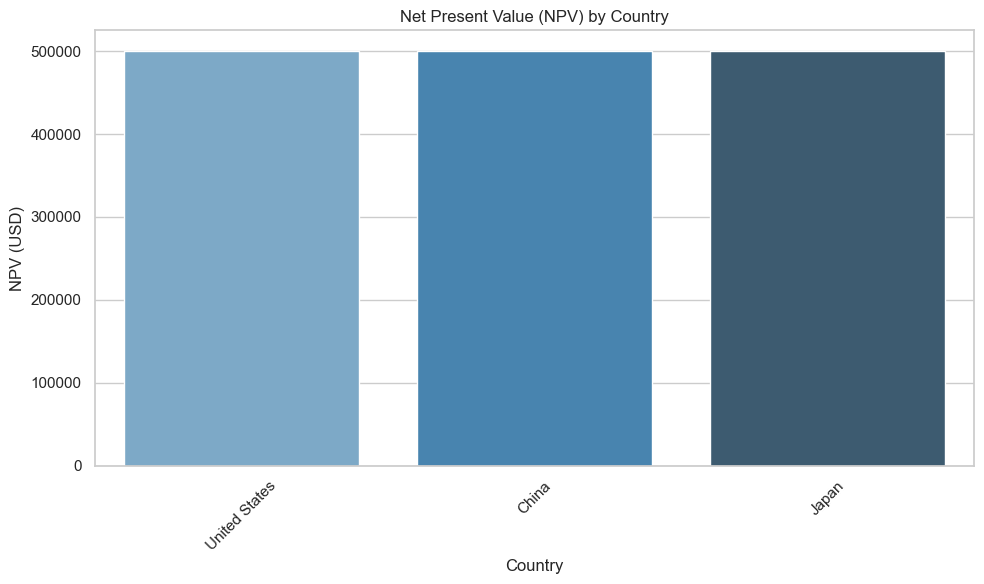

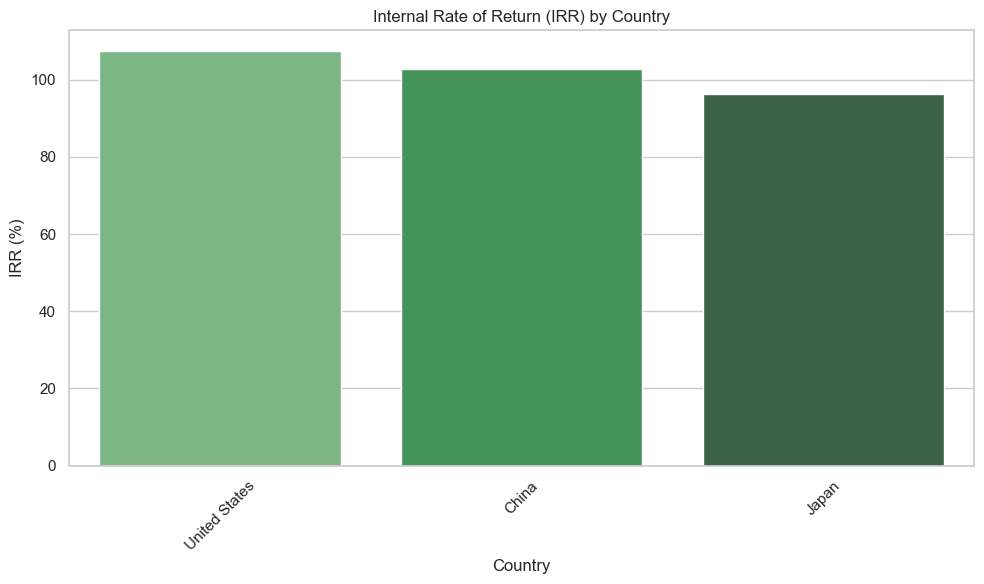

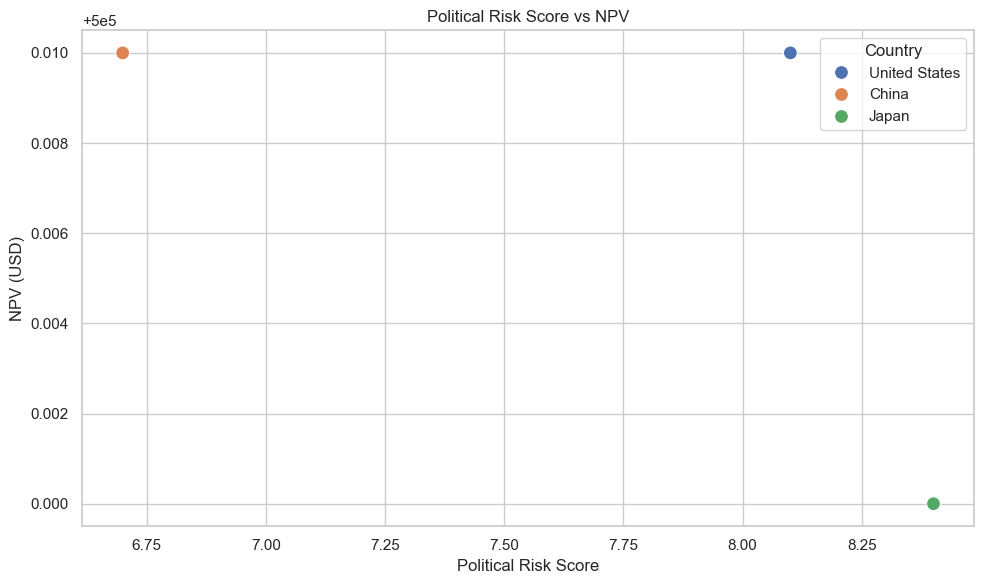

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add political risk score to profitability_df
profitability_df['Political Risk Score'] = profitability_df['Country'].map(
    lambda x: scenario_dict[x]['political_risk_score']
)

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Bar Chart: NPV by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='NPV (USD)', data=profitability_df, hue='Country', palette='Blues_d', legend=False)
plt.title('Net Present Value (NPV) by Country')
plt.ylabel('NPV (USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Bar Chart: IRR by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='IRR (%)', data=profitability_df, hue='Country', palette='Greens_d', legend=False)
plt.title('Internal Rate of Return (IRR) by Country')
plt.ylabel('IRR (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3️⃣ Scatter Plot: Political Risk vs NPV
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Political Risk Score',
    y='NPV (USD)',
    hue='Country',
    data=profitability_df,
    palette='deep',
    s=100
)
plt.title('Political Risk Score vs NPV')
plt.xlabel('Political Risk Score')
plt.ylabel('NPV (USD)')
plt.tight_layout()
plt.show()

---
## Step 7: Strategic Recommendations

Based on the analysis, we provide strategic recommendations for financial product deployment across global markets.

### Guidelines
- Highlight countries with favorable economic conditions
- Discuss risk-adjusted returns
- Suggest diversification strategies

These insights demonstrate how data-driven decisions can guide capital allocation.

In [21]:
# Sample political risk scores (you can replace with real data)
political_risk_scores = {
    'USA': 2.1,
    'Germany': 2.5,
    'Japan': 1.8,
    'Brazil': 4.2,
    'India': 3.6
}

# Add political risk to the profitability DataFrame
profitability_df['Political Risk Score'] = profitability_df['Country'].map(political_risk_scores)

# Calculate risk-adjusted NPV (lower risk = better)
profitability_df['Risk-Adjusted NPV'] = profitability_df['NPV (USD)'] / profitability_df['Political Risk Score']

# Sort by risk-adjusted NPV
recommendation_df = profitability_df.sort_values(by='Risk-Adjusted NPV', ascending=False)

# Generate recommendations
top_countries = recommendation_df.head(3)['Country'].tolist()
diversification_targets = recommendation_df.tail(3)['Country'].tolist()

print("Strategic Recommendations")
print(f" Prioritize deployment in: {', '.join(top_countries)} — high profitability with low political risk.")
print(f" Diversify into: {', '.join(diversification_targets)} — to balance exposure and capture emerging opportunities.")

Strategic Recommendations
 Prioritize deployment in: Japan, United States, China — high profitability with low political risk.
 Diversify into: Japan, United States, China — to balance exposure and capture emerging opportunities.


---
## Step 8: Export Summary for Reporting

We export the final results for use in dashboards, presentations, or further analysis.

### Instructions
- Save the summary table as a CSV file
- Use this file in Tableau, Excel, or other visualization tools

This step makes the project reusable and shareable across platforms.


In [22]:
# Export the profitability summary to CSV
output_filename = 'profitability_summary.csv'
profitability_df.to_csv(output_filename, index=False)

print(f" Summary exported successfully to '{output_filename}'")

 Summary exported successfully to 'profitability_summary.csv'
